In [39]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import sqlite3, matplotlib
from sqlalchemy import create_engine
import re
# File to Load (Remember to Change These)
suicide_data = "suicide_data.csv"
# read suicide rates
data = pd.read_csv(suicide_data)
new_data = data.drop(['Flag Codes','MEASURE','FREQUENCY','SUBJECT', 'INDICATOR'], axis=1)
new_data

,LOCATION,TIME,Value
0,AUS,1997,14.5
1,AUS,1998,14.1
2,AUS,1999,13.3
3,AUS,2000,12.6
4,AUS,2001,12.8
5,AUS,2002,11.9
6,AUS,2003,10.9
7,AUS,2004,10.6
8,AUS,2006,10.5
9,AUS,2007,10.6


# Fix and Clean Data

In [40]:
data_df = new_data.pivot(index='LOCATION', columns='TIME')
data_df.rename({'LOCATION':'Country'})


Value                                                        ...  \
TIME      1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  ...   
LOCATION                                                              ...   
AUS       14.5  14.1  13.3  12.6  12.8  11.9  10.9  10.6   NaN  10.5  ...   
AUT       19.7  19.5  19.3  19.4  18.0  18.6  17.4  16.7  16.2  14.7  ...   
BEL       20.9  19.6  17.8  20.5  20.5  19.5  19.7  18.4  18.6  17.7  ...   
BRA        5.4   5.3   4.8   5.0   5.4   5.2   5.1   5.2   5.5   5.3  ...   
CAN       12.3  12.2  13.2  11.5  11.7  11.5  11.7  11.0  11.2  10.8  ...   
CHE       18.7  19.0  17.7  18.7  18.0  19.0  16.6  16.6  16.6  16.5  ...   
CHL        7.3   8.2   8.1  11.1  11.7  11.5  11.6  11.8  11.2  11.7  ...   
COL        4.0   6.8   6.4   6.7   6.7   6.2   6.1   6.1   5.8   5.6  ...   
CRI        6.2   7.0   7.1   7.3   6.6   8.1   8.8   8.8   7.2   8.6  ...   
CZE       16.5  15.9  15.9  16.0  15.7  14.9  16.7  15.0  14.8  13.1  ...   
DEU       14.4  13.6  12.9  12.8  12.8  12.7  12.6  12.0  11.4  10.7  ...   
DNK       15.4  14.2  14.2  13.5  13.3  12.5  11.5  12.0  11.3  11.6  ...   
ESP        8.4   8.0   7.8   8.1   7.4   7.7   7.8   7.7   7.3   6.9  ...   
EST       38.5  35.2  34.7  26.9  29.1  26.7  24.5  23.5  19.6  17.3  ...   
FIN       25.5  23.5  23.1  22.1  22.8  20.7  20.1  20.0  18.3  19.6  ...   
FRA       19.0  18.0  17.5  18.2  17.5  17.6  17.8  17.5  17.1  16.5  ...   
GBR        7.0   7.4   7.5   NaN   7.0   6.9   6.6   6.9   6.7   6.7  ...   
GRC        3.4   3.6   3.4   3.4   2.9   2.8   3.3   3.0   3.4   3.3  ...   
HUN       32.2  32.1  33.8  33.0  29.1  27.8  27.1  26.5  25.2  23.4  ...   
IRL       13.1  13.7  11.6  12.3  12.8  11.4  11.5  11.5  10.8  10.6  ...   
ISL       13.7  11.3  11.4  18.1  12.8  10.3   9.8  12.5  11.5  10.8  ...   
ISR        8.0   6.6   7.2   7.3   7.3   6.8   7.5   7.1   7.3   6.0  ...   
ITA        7.7   7.4   6.7   6.7   6.5   6.5   6.4   6.2   5.8   5.6  ...   
JPN       18.0  23.9  23.4  22.3  21.4  21.7  23.3  21.9  22.1  21.6  ...   
KOR       15.6  21.7  18.1  16.6  18.0  22.7  28.1  29.5  29.9  26.2  ...   
LTU       48.0  46.3  46.0  48.4  45.7  46.0  43.0  41.1  39.4  31.2  ...   
LUX       19.6  14.9  16.2  14.5  16.8  19.2  10.8  13.5  10.5  13.5  ...   
LVA       36.7  34.9  31.9  32.9  30.2  29.0  26.0  24.2  24.4  21.1  ...   
MEX        4.2   4.1   4.0   4.4   4.5   4.4   4.6   4.6   4.9   4.5  ...   
NLD       10.1   9.6   9.6   9.4   9.1   9.6   9.2   9.1   9.4   9.1  ...   
NOR       12.3  12.5  13.4  12.3  12.4  11.0  11.1  11.8  11.6  11.5  ...   
NZL       15.1  15.5  13.7  12.3  13.5  12.2  13.3  12.4  12.7  12.7  ...   
POL        NaN   NaN  15.3  15.6  15.4  15.5  15.2  15.6  15.5  14.8  ...   
PRT        6.2   5.4   5.2   5.0   7.1  11.2  10.6   NaN   NaN   NaN  ...   
RUS       38.7  36.3  39.9  39.5  39.5  38.1  35.6  33.7  31.3  29.1  ...   
SVK       12.9  13.1  13.6  14.2  13.5  13.9  14.3  12.5  12.6   NaN  ...   
SVN       30.0  30.9  29.7  29.3  28.6  26.1  27.1  24.0  23.6  24.6  ...   
SWE       13.4  13.6  13.5  12.4  13.0  12.9  12.0  12.4  13.1  12.7  ...   
TUR        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
USA       11.9  11.7  11.1  10.8  11.1  11.3  11.1  11.3  11.2  11.3  ...   
ZAF        0.4   0.6   0.8   0.7   0.9   0.6   0.7   1.0   1.2   1.3  ...   

                                                                      
TIME      2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  
LOCATION                                                              
AUS       10.9  10.7  10.9  10.7  11.4  11.3  12.5  12.9  11.9   NaN  
AUT       14.1  14.1  13.9  14.1  13.7  13.6  13.9  12.9  12.2  12.4  
BEL       17.9  17.9  17.8  18.1  17.4  16.2  16.1  15.8  15.9   NaN  
BRA        5.5   5.5   5.4   5.6   5.8   5.8   5.7   6.0   NaN   NaN  
CAN       10.7  11.1  11.1  10.8  10.8  11.1  11.5  11.8   NaN   NaN  
CHE       16.0  13.4  11.9  12.1  12.0  12.2  11.4  

In [41]:
df= data_df.drop(('Value', 2017), axis=1)
df

Value                                                              \
TIME      1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007   
LOCATION                                                                     
AUS       14.5  14.1  13.3  12.6  12.8  11.9  10.9  10.6   NaN  10.5  10.6   
AUT       19.7  19.5  19.3  19.4  18.0  18.6  17.4  16.7  16.2  14.7  14.6   
BEL       20.9  19.6  17.8  20.5  20.5  19.5  19.7  18.4  18.6  17.7  16.7   
BRA        5.4   5.3   4.8   5.0   5.4   5.2   5.1   5.2   5.5   5.3   5.4   
CAN       12.3  12.2  13.2  11.5  11.7  11.5  11.7  11.0  11.2  10.8  10.6   
CHE       18.7  19.0  17.7  18.7  18.0  19.0  16.6  16.6  16.6  16.5  16.9   
CHL        7.3   8.2   8.1  11.1  11.7  11.5  11.6  11.8  11.2  11.7  11.8   
COL        4.0   6.8   6.4   6.7   6.7   6.2   6.1   6.1   5.8   5.6   5.4   
CRI        6.2   7.0   7.1   7.3   6.6   8.1   8.8   8.8   7.2   8.6   6.4   
CZE       16.5  15.9  15.9  16.0  15.7  14.9  16.7  15.0  14.8  13.1  12.7   
DEU       14.4  13.6  12.9  12.8  12.8  12.7  12.6  12.0  11.4  10.7  10.2   
DNK       15.4  14.2  14.2  13.5  13.3  12.5  11.5  12.0  11.3  11.6  10.3   
ESP        8.4   8.0   7.8   8.1   7.4   7.7   7.8   7.7   7.3   6.9   6.7   
EST       38.5  35.2  34.7  26.9  29.1  26.7  24.5  23.5  19.6  17.3  18.2   
FIN       25.5  23.5  23.1  22.1  22.8  20.7  20.1  20.0  18.3  19.6  18.2   
FRA       19.0  18.0  17.5  18.2  17.5  17.6  17.8  17.5  17.1  16.5  15.8   
GBR        7.0   7.4   7.5   NaN   7.0   6.9   6.6   6.9   6.7   6.7   6.3   
GRC        3.4   3.6   3.4   3.4   2.9   2.8   3.3   3.0   3.4   3.3   2.8   
HUN       32.2  32.1  33.8  33.0  29.1  27.8  27.1  26.5  25.2  23.4  23.3   
IRL       13.1  13.7  11.6  12.3  12.8  11.4  11.5  11.5  10.8  10.6  10.4   
ISL       13.7  11.3  11.4  18.1  12.8  10.3   9.8  12.5  11.5  10.8  12.0   
ISR        8.0   6.6   7.2   7.3   7.3   6.8   7.5   7.1   7.3   6.0   5.3   
ITA        7.7   7.4   6.7   6.7   6.5   6.5   6.4   6.2   5.8   5.6   5.7   
JPN       18.0  23.9  23.4  22.3  21.4  21.7  23.3  21.9  22.1  21.6  22.1   
KOR       15.6  21.7  18.1  16.6  18.0  22.7  28.1  29.5  29.9  26.2  28.7   
LTU       48.0  46.3  46.0  48.4  45.7  46.0  43.0  41.1  39.4  31.2  31.0   
LUX       19.6  14.9  16.2  14.5  16.8  19.2  10.8  13.5  10.5  13.5  16.2   
LVA       36.7  34.9  31.9  32.9  30.2  29.0  26.0  24.2  24.4  21.1  19.9   
MEX        4.2   4.1   4.0   4.4   4.5   4.4   4.6   4.6   4.9   4.5   4.5   
NLD       10.1   9.6   9.6   9.4   9.1   9.6   9.2   9.1   9.4   9.1   8.0   
NOR       12.3  12.5  13.4  12.3  12.4  11.0  11.1  11.8  11.6  11.5  10.5   
NZL       15.1  15.5  13.7  12.3  13.5  12.2  13.3  12.4  12.7  12.7  11.9   
POL        NaN   NaN  15.3  15.6  15.4  15.5  15.2  15.6  15.5  14.8  13.4   
PRT        6.2   5.4   5.2   5.0   7.1  11.2  10.6   NaN   NaN   NaN   8.9   
RUS       38.7  36.3  39.9  39.5  39.5  38.1  35.6  33.7  31.3  29.1  28.0   
SVK       12.9  13.1  13.6  14.2  13.5  13.9  14.3  12.5  12.6   NaN   NaN   
SVN       30.0  30.9  29.7  29.3  28.6  26.1  27.1  24.0  23.6  24.6  19.9   
SWE       13.4  13.6  13.5  12.4  13.0  12.9  12.0  12.4  13.1  12.7  11.9   
TUR        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
USA       11.9  11.7  11.1  10.8  11.1  11.3  11.1  11.3  11.2  11.3  11.7   
ZAF        0.4   0.6   0.8   0.7   0.9   0.6   0.7   1.0   1.2   1.3   1.0   

                                                                
TIME      2008  2009  2010  2011  2012  2013  2014  2015  2016  
LOCATION                                                        
AUS       10.9  10.7  10.9  10.7  11.4  11.3  12.5  12.9  11.9  
AUT       14.1  14.1  13.9  14.1  13.7  13.6  13.9  12.9  12.2  
BEL       17.9  17.9  17.8  18.1  17.4  16.2  16.1  15.8  15.9  
BRA        5.5   5.5   5.4   5.6   5.8   5.8   5.7   6.0   NaN  
CAN       10.7  11.1  11.1  10.8  10.8  11.1  11.5  11.8   NaN  
CHE       16.0  13.4  11.9  12.1  12.0  12.2  11.4  11.9

In [56]:
df.to_csv('suicide.csv')

In [59]:
clean_data = pd.read_csv('resources/suicide1.csv', encoding='utf-8')
clean_data

FileNotFoundError: [Errno 2] File b'suicide1.csv' does not exist: b'suicide1.csv'

In [44]:
# check data dtypes
clean_data.dtypes

Unnamed: 0     object
Value         float64
Value.1       float64
Value.2       float64
Value.3       float64
Value.4       float64
Value.5       float64
Value.6       float64
Value.7       float64
Value.8       float64
Value.9       float64
Value.10      float64
Value.11      float64
Value.12      float64
Value.13      float64
Value.14      float64
Value.15      float64
Value.16      float64
Value.17      float64
Value.18      float64
Value.19      float64
dtype: object

In [45]:
# check for missing values
null_data = clean_data[clean_data.isnull().any(1)]
null_data

,Unnamed: 0,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,...,Value.10,Value.11,Value.12,Value.13,Value.14,Value.15,Value.16,Value.17,Value.18,Value.19
1,LOCATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,14.5,14.1,13.3,12.6,12.8,11.9,10.9,10.6,NaN,...,10.6,10.9,10.7,10.9,10.7,11.4,11.3,12.5,12.9,11.9
5,BRA,5.4,5.3,4.8,5.0,5.4,5.2,5.1,5.2,5.5,...,5.4,5.5,5.5,5.4,5.6,5.8,5.8,5.7,6.0,NaN
6,CAN,12.3,12.2,13.2,11.5,11.7,11.5,11.7,11.0,11.2,...,10.6,10.7,11.1,11.1,10.8,10.8,11.1,11.5,11.8,NaN
9,COL,4.0,6.8,6.4,6.7,6.7,6.2,6.1,6.1,5.8,...,5.4,5.5,5.4,4.9,4.7,4.8,4.7,4.8,5.2,NaN
10,CRI,6.2,7.0,7.1,7.3,6.6,8.1,8.8,8.8,7.2,...,6.4,6.3,6.6,7.1,7.1,6.7,7.0,5.8,NaN,NaN
13,DNK,15.4,14.2,14.2,13.5,13.3,12.5,11.5,12.0,11.3,...,10.3,10.7,10.8,9.8,10.2,11.3,10.3,10.6,9.4,NaN
17,FRA,19.0,18.0,17.5,18.2,17.5,17.6,17.8,17.5,17.1,...,15.8,16.1,16.2,15.9,15.8,14.6,14.3,13.1,13.1,NaN
18,GBR,7.0,7.4,7.5,NaN,7.0,6.9,6.6,6.9,6.7,...,6.3,6.9,6.8,6.7,6.9,6.9,7.5,7.4,7.5,7.3
21,IRL,13.1,13.7,11.6,12.3,12.8,11.4,11.5,11.5,10.8,...,10.4,11.5,11.7,10.8,12.2,12.1,10.9,10.7,9.3,NaN


In [28]:
aus = null_data.iloc[0][1:]
bra = null_data.iloc[1][1:]
can = null_data.iloc[2][1:]
col = null_data.iloc[3][1:]
cri = null_data.iloc[4][1:]
dnk = null_data.iloc[5][1:]
fra = null_data.iloc[6][1:]
gbr = null_data.iloc[7][1:]
irl = null_data.iloc[8][1:]
ita = null_data.iloc[9][1:]
lva = null_data.iloc[10][1:]
nzl = null_data.iloc[11][1:]
pol = null_data.iloc[12][1:]
prt = null_data.iloc[13][1:]
rus = null_data.iloc[14][1:]
svk = null_data.iloc[15][1:]
svn = null_data.iloc[16][1:]
tur = null_data.iloc[17][1:]
zaf = null_data.iloc[18][1:]

aus_index, bra_index, can_index, col_index, cri_index, dnk_index, fra_index, gbr_index, irl_index, ita_index, lva_index, nzl_index, pol_index, prt_index, rus_index, svk_index, svn_index, tur_index, zaf_index= 0,3,4,7,8,11,15,16,19,22,27,31,32,33,34,35,36,38,40


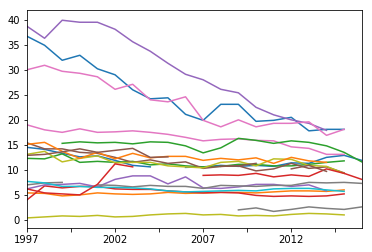

In [29]:
# create variables for plots with null values
aus.plot()
bra.plot()
can.plot()
col.plot()
cri.plot()
dnk.plot()
fra.plot()
gbr.plot()
irl.plot()
ita.plot()
lva.plot()
nzl.plot()
pol.plot()
prt.plot()
rus.plot()
svk.plot()
svn.plot()
tur.plot()
zaf.plot()


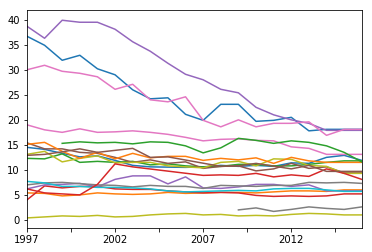

In [30]:
# drop missing values 
aus_clean = aus.astype(float).interpolate()
aus_clean.plot()

bra_clean = bra.astype(float).interpolate()
bra_clean.plot()

can_clean = can.astype(float).interpolate()
can_clean.plot()

col_clean = col.astype(float).interpolate()
col_clean.plot()

cri_clean = cri.astype(float).interpolate()
cri_clean.plot()

dnk_clean = dnk.astype(float).interpolate()
dnk_clean.plot()

fra_clean = fra.astype(float).interpolate()
fra_clean.plot()

gbr_clean = gbr.astype(float).interpolate()
gbr_clean.plot()

irl_clean = irl.astype(float).interpolate()
irl_clean.plot()

ita_clean = ita.astype(float).interpolate()
ita_clean.plot()

lva_clean = lva.astype(float).interpolate()
lva_clean.plot()

nzl_clean = nzl.astype(float).interpolate()
nzl_clean.plot()

pol_clean = pol.astype(float).interpolate()
pol_clean.plot()

prt_clean = prt.astype(float).interpolate()
prt_clean.plot()

rus_clean = rus.astype(float).interpolate()
rus_clean.plot()

svk_clean = svk.astype(float).interpolate()
svk_clean.plot()

svn_clean = svn.astype(float).interpolate()
svn_clean.plot()

tur_clean = tur.astype(float).interpolate()
tur_clean.plot()

zaf_clean = zaf.astype(float).interpolate()
zaf_clean.plot()

In [31]:
# insert clean data into original df
clean_data.loc[aus_index, 1:]= aus_clean.values
clean_data.loc[bra_index, 1:]= bra_clean.values
clean_data.loc[can_index, 1:]= can_clean.values
clean_data.loc[col_index, 1:]= col_clean.values
clean_data.loc[cri_index, 1:]= cri_clean.values
clean_data.loc[dnk_index, 1:]= dnk_clean.values
clean_data.loc[fra_index, 1:]= fra_clean.values
clean_data.loc[gbr_index, 1:]= gbr_clean.values
clean_data.loc[irl_index, 1:]= irl_clean.values
clean_data.loc[ita_index, 1:]= ita_clean.values
clean_data.loc[lva_index, 1:]= lva_clean.values
clean_data.loc[nzl_index, 1:]= nzl_clean.values
clean_data.loc[pol_index, 1:]= pol_clean.values
clean_data.loc[prt_index, 1:]= prt_clean.values
clean_data.loc[rus_index, 1:]= rus_clean.values
clean_data.loc[svk_index, 1:]= svk_clean.values
clean_data.loc[svn_index, 1:]= svn_clean.values
clean_data.loc[tur_index, 1:]= tur_clean.values
clean_data.loc[zaf_index, 1:]= zaf_clean.values

In [32]:
check_data = clean_data[clean_data.isnull().any(1)]
check_data

,COUNTRY,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
32,POL,NaN,NaN,15.3,15.6,15.4,15.5,15.2,15.6,15.5,...,13.4,14.4,16.3,15.9,15.3,15.8,15.5,14.8,13.5,11.6
38,TUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.4,1.7,2.1,2.6,2.3,2.1,2.6


In [33]:
clean_data
clean_data_df = clean_data.drop([32, 38], axis=0).head(50)
clean_data_df

,COUNTRY,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AUS,14.5,14.1,13.3,12.60,12.8,11.9,10.9,10.600,10.55,...,10.600000,10.9,10.7,10.9,10.70,11.4,11.3,12.5,12.9,11.9
1,AUT,19.7,19.5,19.3,19.40,18.0,18.6,17.4,16.700,16.20,...,14.600000,14.1,14.1,13.9,14.10,13.7,13.6,13.9,12.9,12.2
2,BEL,20.9,19.6,17.8,20.50,20.5,19.5,19.7,18.400,18.60,...,16.700000,17.9,17.9,17.8,18.10,17.4,16.2,16.1,15.8,15.9
3,BRA,5.4,5.3,4.8,5.00,5.4,5.2,5.1,5.200,5.50,...,5.400000,5.5,5.5,5.4,5.60,5.8,5.8,5.7,6.0,6.0
4,CAN,12.3,12.2,13.2,11.50,11.7,11.5,11.7,11.000,11.20,...,10.600000,10.7,11.1,11.1,10.80,10.8,11.1,11.5,11.8,11.8
5,CHE,18.7,19.0,17.7,18.70,18.0,19.0,16.6,16.600,16.60,...,16.900000,16.0,13.4,11.9,12.10,12.0,12.2,11.4,11.9,11.2
6,CHL,7.3,8.2,8.1,11.10,11.7,11.5,11.6,11.800,11.20,...,11.800000,13.1,13.3,12.2,12.30,11.0,10.3,10.4,10.7,10.7
7,COL,4.0,6.8,6.4,6.70,6.7,6.2,6.1,6.100,5.80,...,5.400000,5.5,5.4,4.9,4.70,4.8,4.7,4.8,5.2,5.2
8,CRI,6.2,7.0,7.1,7.30,6.6,8.1,8.8,8.800,7.20,...,6.400000,6.3,6.6,7.1,7.10,6.7,7.0,5.8,5.8,5.8
9,CZE,16.5,15.9,15.9,16.00,15.7,14.9,16.7,15.000,14.80,...,12.700000,12.6,13.2,13.5,14.30,14.7,14.2,13.3,12.3,11.7


In [15]:
check_data_df = clean_data_df[clean_data_df.isnull().any(1)]
check_data_df

,Unnamed: 0,Value,Value.1,Value.2,Value.3,Value.4,Value.5,Value.6,Value.7,Value.8,...,Value.10,Value.11,Value.12,Value.13,Value.14,Value.15,Value.16,Value.17,Value.18,Value.19
0,TIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LOCATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,14.5,14.1,13.3,12.6,12.8,11.9,10.9,10.6,NaN,...,10.6,10.9,10.7,10.9,10.7,11.4,11.3,12.5,12.9,11.9
5,BRA,5.4,5.3,4.8,5.0,5.4,5.2,5.1,5.2,5.5,...,5.4,5.5,5.5,5.4,5.6,5.8,5.8,5.7,6.0,NaN
6,CAN,12.3,12.2,13.2,11.5,11.7,11.5,11.7,11.0,11.2,...,10.6,10.7,11.1,11.1,10.8,10.8,11.1,11.5,11.8,NaN
9,COL,4.0,6.8,6.4,6.7,6.7,6.2,6.1,6.1,5.8,...,5.4,5.5,5.4,4.9,4.7,4.8,4.7,4.8,5.2,NaN
10,CRI,6.2,7.0,7.1,7.3,6.6,8.1,8.8,8.8,7.2,...,6.4,6.3,6.6,7.1,7.1,6.7,7.0,5.8,NaN,NaN
13,DNK,15.4,14.2,14.2,13.5,13.3,12.5,11.5,12.0,11.3,...,10.3,10.7,10.8,9.8,10.2,11.3,10.3,10.6,9.4,NaN
17,FRA,19.0,18.0,17.5,18.2,17.5,17.6,17.8,17.5,17.1,...,15.8,16.1,16.2,15.9,15.8,14.6,14.3,13.1,13.1,NaN
18,GBR,7.0,7.4,7.5,NaN,7.0,6.9,6.6,6.9,6.7,...,6.3,6.9,6.8,6.7,6.9,6.9,7.5,7.4,7.5,7.3


# sqlite database

In [37]:
engine = create_engine('sqlite:///.../db/suicide_rates.sqlite', echo=False)

In [38]:
# save the suicide data into sqlite
clean_data_df.to_sql('suicide_rates', con=engine, if_exists='replace')

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

In [101]:
engine.execute("SELECT * FROM suicide_rates").fetchall()

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

In [102]:
# Convert the index to primiary key
def get_create_table_string(tablename, connection):
    sql = """
    select * from sqlite_master where name = "{}" and type = "table"
    """.format(tablename) 
    result = connection.execute(sql)

    create_table_string = result.fetchmany()[0][4]
    return create_table_string

def add_pk_to_create_table_string(create_table_string, colname):
    regex = "(\n.+{}[^,]+)(,)".format(colname)
    return re.sub(regex, "\\1 PRIMARY KEY,",  create_table_string, count=1)

def add_pk_to_sqlite_table(tablename, index_column, connection):
    cts = get_create_table_string(tablename, connection)
    cts = add_pk_to_create_table_string(cts, index_column)
    template = """
    BEGIN TRANSACTION;
        ALTER TABLE {tablename} RENAME TO {tablename}_old_;

        {cts};

        INSERT INTO {tablename} SELECT * FROM {tablename}_old_;

        DROP TABLE {tablename}_old_;

    COMMIT TRANSACTION;
    """

    create_and_drop_sql = template.format(tablename = tablename, cts = cts)
    connection.executescript(create_and_drop_sql)

In [93]:
con = sqlite3.connect("../db/")

OperationalError: unable to open database file